# ADVANCED CLASSIFICATION PREDICT

# Predict Overview: EA Twitter Sentiment Classification
Companies would like to determine how people perceive climate change and whether or not they believe it is a real threat. 

Our mission is to deliver a precise and durable solution to this objective, granting companies the ability to tap into a wide range of consumer sentiments across various demographics and geographic regions. This, in turn, enhances their understanding and empowers them to shape future marketing strategies based on valuable insights.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>

## 1. Importing Packages

<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡                                                                                                    |
| :--------------------------------------------------------------------------------------------------------------------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


<a id="two"></a>

## 2. Loading the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Loading the data ⚡                                                          |
| :------------------------------------------------------------------------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_test = pd.read_csv ("test_with_no_labels.csv")
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [4]:
df_train = pd.read_csv('train.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<a id="three"></a>

## 3. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Exploratory data analysis ⚡                                                             |
| :------------------------------------------------------------------------------------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


The EDA  includes:
- Summary analysis
- Null values
- Classes of tweets - Sentiments
- Number of words of tweets



## Summary analysis

In [5]:
df_test.describe()


,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [6]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Null values

In [7]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [8]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
df_test.shape

(10546, 2)

## Sentiments meaning
- Anti climate Change = -1
- Neutral = 0
- Pro Climate change = 1
- News = 2

## 3.1 Comparing the number of tweets of categories
- Distribution
- Pie chart
- Word cloud
- Top 20 words used

### 3.1.1 Bar chart showing the counts of tweets per sentiment

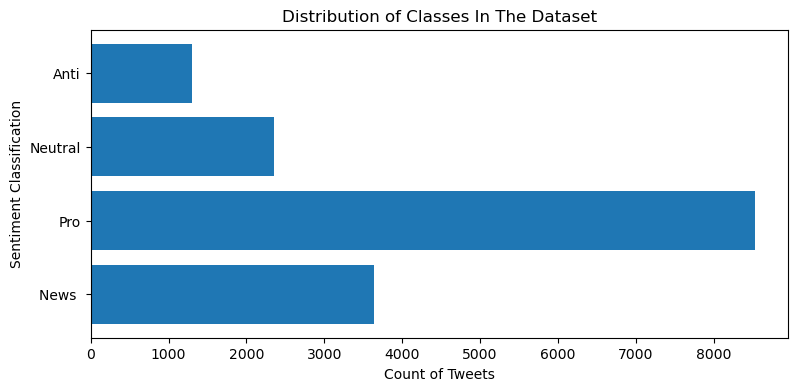

In [10]:
senti_counts = df_train["sentiment"].value_counts()
news = senti_counts[2] 
pro = senti_counts[1]   
neutral = senti_counts[0]
anti = senti_counts[-1]  

plt.figure( figsize=(9,4))
plt.barh(['News ','Pro','Neutral','Anti'], [news,pro,neutral,anti]) # horizontal bar graph to compare classes of tweets.
plt.colours = ['red', 'green', 'blue', 'orange']
plt.xlabel('Count of Tweets') #X-label of the data
plt.ylabel('Sentiment Classification') #Y_label of the data 
plt.title('Distribution of Classes In The Dataset') #Give the data a title 'Dataset lables distribution'
plt.show()

### 3.1.2 Pie chart showing the percentages of tweets per sentiment

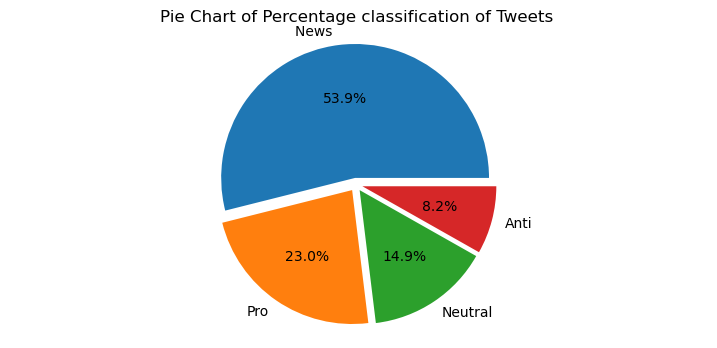

In [11]:
class_counts = df_train["sentiment"].value_counts()
plt.figure( figsize=(9,4))
plt.pie(class_counts, labels=['News ','Pro','Neutral','Anti'], explode=[0.05,0.05,0.05,0.05], autopct='%1.1f%%')
plt.title("Pie Chart of Percentage classification of Tweets ")
plt.axis('equal')
plt.show()

Insights:
- News has the highest percentage of tweets followed by Pro climate change, Neutral and anti climate change respectively

### 3.1.3 Word cloud showing top words used in every class

In [12]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(i for i in df_train["message"])
text = str(text)

ModuleNotFoundError: No module named 'wordcloud'

In [13]:
wordcloud = WordCloud()
tweet_cloud = wordcloud.generate(text)
plt.figure( figsize=(9,4))
plt.imshow(tweet_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

 ### 3.1.4 Top 20 words in the tweets

In [14]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(i for i in df_train["message"])
text = str(text)

ModuleNotFoundError: No module named 'wordcloud'

In [15]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

NameError: name 'text' is not defined

In [16]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:21]
top_20_words = dict(sorted_freq_dict)

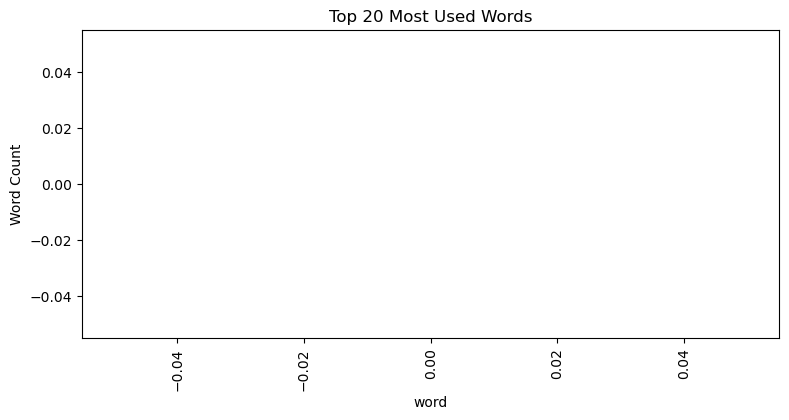

In [17]:
x_labels = list(top_20_words.keys())
values = list(top_20_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used
- 1. Climate
- 2. Change
- 3. rt
- 4. Trump
- 5. Global
- 6. US
- 7. via
- 8. Says
- 9. EPA
- 10. New
- 11. Scientists
- 12. Trumps
- 13. Donald
- 14. Fight
- 15. China
- 16. Could
- 17. News
- 18. world
- 19. Scott
- 20. Paris

In [18]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(i for i in df_anti["message"])
text = str(text)

ModuleNotFoundError: No module named 'wordcloud'

In [19]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

NameError: name 'text' is not defined

In [20]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:21]
top_20_words = dict(sorted_freq_dict)

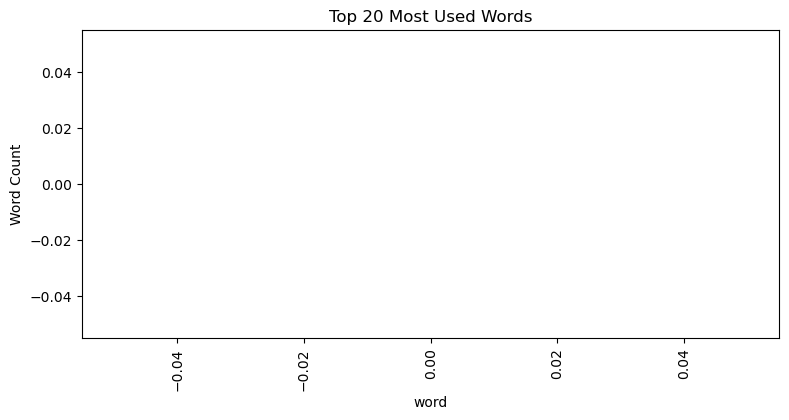

In [21]:
x_labels = list(top_20_words.keys())
values = list(top_20_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [22]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(i for i in df_pro["message"])
text = str(text)

ModuleNotFoundError: No module named 'wordcloud'

In [23]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

NameError: name 'text' is not defined

In [24]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:21]
top_20_words = dict(sorted_freq_dict)

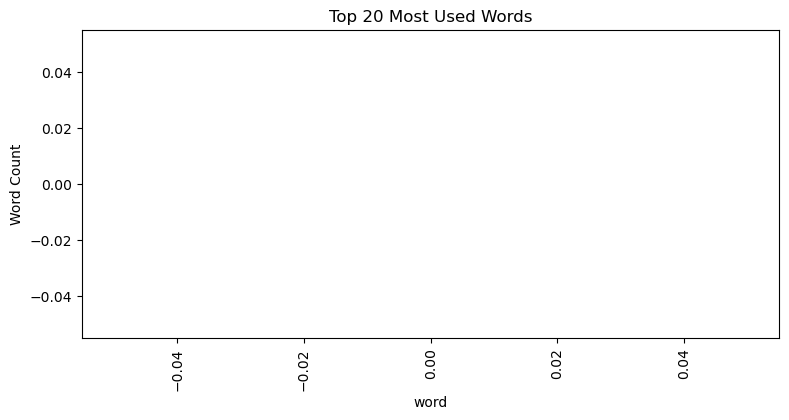

In [25]:
x_labels = list(top_20_words.keys())
values = list(top_20_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

## 3.2 Comparing the *length of the tweet* per categories
- Box plots
- Distribution bar graphs
- Summary of Stats
- Correlation

### 3.2.1 Box plot

In [27]:
length = [len(tweet) for tweet in df_train['message']]
df_train['length'] = length
df_train['length']

0        140
1         62
2        140
3         99
4        122
        ... 
15814    140
15815    119
15816    133
15817    129
15818    102
Name: length, Length: 15819, dtype: int64

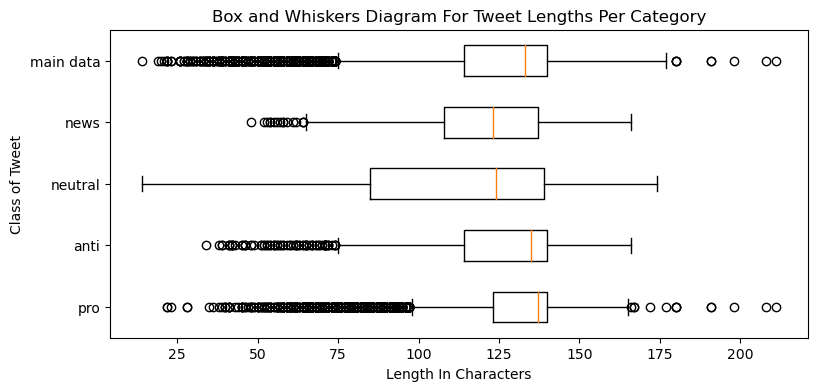

In [28]:
#creating class subsets for the datase

df_anti = df_train.copy()[df_train['sentiment'] == -1]
df_neutral = df_train.copy()[df_train['sentiment'] == 0]
df_pro = df_train.copy()[df_train['sentiment'] == 1]
df_news = df_train.copy()[df_train['sentiment'] == 2]

#storing the size data in separate variables

pro_len = df_pro['length']
neutral_len = df_neutral['length']
anti_len = df_anti['length']
news_len = df_news['length']
data_len = df_train['length']

#creating a list of all the length datasets

len_data = [pro_len, anti_len, neutral_len, news_len, data_len]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9,4))

# Create the box plots
ax.boxplot(len_data, vert=False)

# Set the labels for each box plot
labels = ['pro', 'anti', 'neutral', 'news', 'main data']
ax.set_yticklabels(labels)

# Set the title and axis labels
plt.title('Box and Whiskers Diagram For Tweet Lengths Per Category')
plt.xlabel('Length In Characters')
plt.ylabel('Class of Tweet')

# Show the plot
plt.show()

### 3.2.2 Summary

In [29]:
print('mean of pro-climate is:  ', round(df_pro['length'].mean(),2))
round(df_pro['length'].describe(),2)

mean of pro-climate is:   129.13


count    8530.00
mean      129.13
std        20.00
min        22.00
25%       123.00
50%       137.00
75%       140.00
max       211.00
Name: length, dtype: float64

In [30]:
print('mean of anti-climate is:  ', round(df_anti['length'].mean(),2))
round(df_anti['length'].describe(),2)

mean of anti-climate is:   123.96


count    1296.00
mean      123.96
std        24.38
min        34.00
25%       114.00
50%       135.00
75%       140.00
max       166.00
Name: length, dtype: float64

In [31]:
print('mean of neutral-climate is:  ', round(df_neutral['length'].mean(),2))
round(df_neutral['length'].describe(),2)

mean of neutral-climate is:   111.12


count    2353.00
mean      111.12
std        32.46
min        14.00
25%        85.00
50%       124.00
75%       139.00
max       174.00
Name: length, dtype: float64

In [32]:
print('mean of news is:  ', round(df_news['length'].mean(),2))
round(df_news['length'].describe(),2)

mean of news is:   120.0


count    3640.00
mean      120.00
std        19.03
min        48.00
25%       108.00
50%       123.00
75%       137.00
max       166.00
Name: length, dtype: float64

### 3.2.3 Bar graph

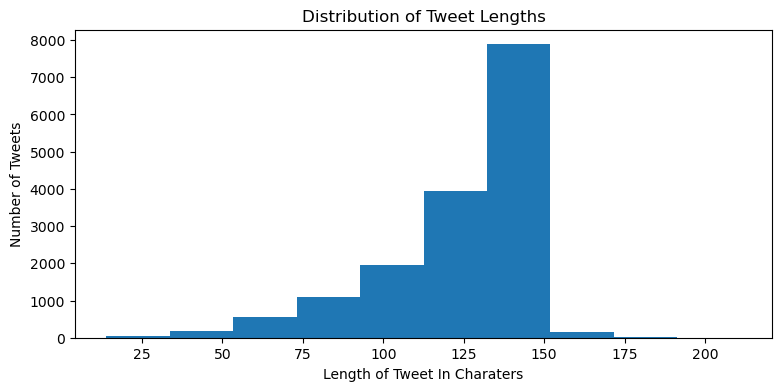

In [33]:
plt.figure( figsize=(9,4))
plt.hist(df_train['length'])
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length of Tweet In Charaters") #X-label of the data
plt.ylabel("Number of Tweets")      #Y_label of the data
plt.show()

### 3.2.4 Correlation between length of tweets and sentiment 

C:\Users\admin\AppData\Local\Temp\ipykernel_808\28272172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


Text(0.5, 1.0, 'Correlation with sentiments')

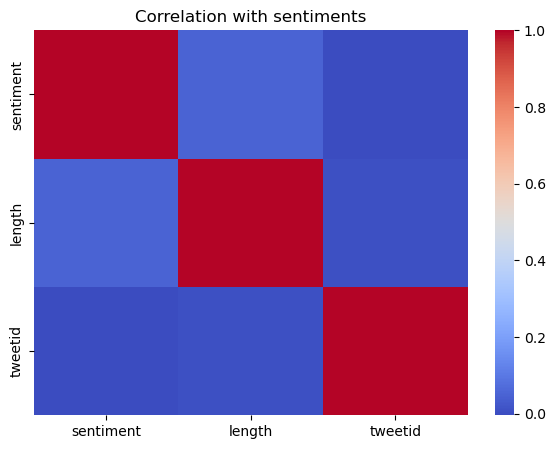

In [34]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Calculate the correlations with the target variable
target_correlations = correlation_matrix['sentiment']

# Sort the features by their correlations with the target variable
sorted_features = target_correlations.abs().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix = correlation_matrix.loc[sorted_features, sorted_features]

# Create a heatmap for the sorted correlations without annotations
plt.figure(figsize=(7, 5))
sns.heatmap(sorted_corr_matrix, cmap='coolwarm')
plt.title('Correlation with sentiments')

## Retweets 

<a id="four"></a>

## 4. Data Engineering

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Data engineering ⚡                                                                                        |
| :------------------------------------------------------------------------------------------------------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---


Data engineering involves data cleaning and feature engineering

## 4.1 Data cleaning
In order to process the tweet messages more effectively the tweets are cleaned using the clean function defined in the code cell below. The clean function does the following.

- Convert all tweet text to lowercase.
- Drop colums that are not important
- Remove @
- Remove punctuation.
- Remove numbers
- Remove stopwords
- Remove line-break code syntax

In [35]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [36]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_train['message'] = df_train['message'].apply(lambda text: cleaning_stopwords(text))

In [37]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    return text

In [38]:
df_train["message"] = df_train["message"].apply(clean)

In [39]:
df_train.head()

,sentiment,message,tweetid,length
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,140
1,1,like lack evidence anthropogenic global warming,126103,62
2,2,rt rawstory researchers say three years act cl...,698562,140
3,1,todayinmaker wired pivotal year war climate ...,573736,99
4,1,rt soynoviodetodas racist sexist climate chan...,466954,122


Tweet id column has no siginificance in the project as it only shows unique twitter number

In [40]:
df_train = df_train.drop('tweetid', axis=1)

### Cleaning also included:
- Tokenization
- Stemming
- Lemmatization

####  Applying Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words"

In [41]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['message'].apply(tokeniser.tokenize)

#### Applying stemming

Stemming is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.”

In [42]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_train['message']= df_train['message'].apply(lambda x: stemming_on_text(x))


#### Applying lemmatizer

Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [43]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_train['message'] = df_train['message'].apply(lambda x: lemmatizer_on_text(x))


## 4.2 Feature Engineering

We added the following features to modify our and for more insights:
- Lengths of tweets

### Length tweets

In [44]:
length = [len(tweet) for tweet in df_train['message']]
df_train['length'] = length

<a id="five"></a>

## 5. Modelling

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Modelling ⚡                                                                                                                |
| :------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---


*Pre processing*

The line X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50) is splitting the data into training and validation sets.

X and y are the feature matrix and target variable, respectively. X contains the features we use to make predictions, and y contains the corresponding target values (in this case, sentiment).

train_test_split() is a function provided by scikit-learn (a popular machine learning library) that is used to split a dataset into training and validation subsets.

The function takes the following arguments:

X: The feature matrix (independent variables). y: The target variable (dependent variable). test_size: This parameter specifies the proportion of the data that should be used for the validation set. In this case, it's set to 0.2, meaning 20% of the data will be used for validation, and the remaining 80% for training. random_state: This is a seed for the random number generator used in the data splitting process. Setting this to a specific value (e.g., 42) ensures that the split is reproducible.

train_test_split() returns four sets of data:

X_train: This contains the feature data for the training set. X_val: This contains the feature data for the validation set. y_train: This contains the target data for the training set. y_val: This contains the target data for the validation set. By splitting the data into training and validation sets, you can train your machine learning model on a portion of the data (X_train and y_train) and evaluate its performance on another portion that it hasn't seen during training (X_val and y_val). This allows us to estimate how well your model is likely to perform on unseen data (seen in Model Performance section).

In [39]:
#Splitting features and target variables
X = df_train['message'] #X is the features of the cleaned tweets
y = df_train['sentiment']    #Y is the target variable which is the train sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Splitting train set into training and testing data
#Print out the shape of the training set and the testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12655,)
(3164,)
(12655,)
(3164,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

## 5.1 Logistic Regression
it makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid. It solves the problem for the following reasons:

It squeezes the range of output values to exist only between 0 and 1.
It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression #Import Logistic Regression from the sklearn
model = LogisticRegression(multi_class='ovr' ) #Call logistic regression and assign it to the 'model' variable

text_lr= Pipeline([('cf', cf),('clf',model)]) #Create a pipeline of the bag of words and the logistic regression

text_lr.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = text_lr.predict(X_test) #Make a prediction of the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print out the classification report

C:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.7424146649810367
f1_score 0.7335626779656659
              precision    recall  f1-score   support

          -1       0.78      0.46      0.58       278
           0       0.54      0.43      0.48       425
           1       0.77      0.86      0.82      1755
           2       0.74      0.75      0.74       706

    accuracy                           0.74      3164
   macro avg       0.71      0.62      0.65      3164
weighted avg       0.74      0.74      0.73      3164



In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

In [28]:
# import and call the TFidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer #Import TFidfVectorizer from sklearn
tfidf = TfidfVectorizer() #Call the TFidfVectorizer and assign it to the tfidf variable


In [29]:
from sklearn.feature_extraction.text import CountVectorizer #Import CountVectorizer from sklearn

cf= CountVectorizer() 

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

model = LogisticRegression(multi_class='ovr') #Call the Logistic Regression model and assign it to the variable 'model'

clf = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the TF-IDF Vectorizer with the logistic model


clf.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred= clf.predict(X_test) #Make predictions and assign the predictions to y_pred

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the weighted f1 score
print(classification_report(y_test, y_pred)) #Classification

accuracy 0.7231352718078382
f1_score 0.6951149568161584
              precision    recall  f1-score   support

          -1       0.83      0.23      0.37       278
           0       0.64      0.32      0.42       425
           1       0.71      0.92      0.80      1755
           2       0.77      0.67      0.72       706

    accuracy                           0.72      3164
   macro avg       0.74      0.54      0.58      3164
weighted avg       0.73      0.72      0.70      3164



# 5.2 SVC

Separate points using a  (p−1)
  dimensional hyperplane. This means that the SVM will construct a decision boundary such that points on the left are assigned a label of  A
  and points on the right are assigned a label of  B
 . When finding this separating hyperplane we wish to maximise the distance of the nearest points to the hyperplane. The technical term for this is maximum separating hyperplane. The data points which dictate where the separating hyperplane goes are called support vectors. 

In [43]:
#Create a pipeline and make predictions of the bag of words using linearSVC
from sklearn.svm import LinearSVC #Import LinearSVC from the sklearn


clf= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

clf.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = clf.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

C:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.7177623261694058
f1_score 0.7155944011875718
              precision    recall  f1-score   support

          -1       0.63      0.51      0.57       278
           0       0.50      0.48      0.49       425
           1       0.79      0.80      0.79      1755
           2       0.70      0.74      0.72       706

    accuracy                           0.72      3164
   macro avg       0.65      0.63      0.64      3164
weighted avg       0.71      0.72      0.72      3164



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
## create a pipeline and fit it with a Linear Support Vector Classifier
from sklearn.svm import LinearSVC #Import LinearSVC from sklearn 

classifier = LinearSVC() #Call LinearSVC and assign the variable 'classifier'

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

clf.fit(X_train, y_train) #Fit the model
y_pred = clf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


C:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.7354614412136536
f1_score 0.7266710333792864
              precision    recall  f1-score   support

          -1       0.72      0.50      0.59       278
           0       0.55      0.40      0.47       425
           1       0.77      0.85      0.81      1755
           2       0.72      0.75      0.74       706

    accuracy                           0.74      3164
   macro avg       0.69      0.62      0.65      3164
weighted avg       0.73      0.74      0.73      3164



In [ ]:
NAIVE BAYES

In [61]:
from sklearn.naive_bayes import  BernoulliNB
naive_bayes =  BernoulliNB()
cnb= Pipeline([('cf', cf),('cnb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.8095
f1_score 0.8052602891777257
              precision    recall  f1-score   support

          -1       0.85      0.93      0.89       977
           0       0.83      0.78      0.80      1024
           1       0.79      0.63      0.70       995
           2       0.77      0.90      0.83      1004

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



In [51]:
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
cnb= Pipeline([('cf', cf),('cnb', knn)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.5300252844500632
f1_score 0.5187294937155361
              precision    recall  f1-score   support

          -1       0.86      0.06      0.12       278
           0       0.25      0.66      0.36       425
           1       0.67      0.69      0.68      1755
           2       0.80      0.24      0.37       706

    accuracy                           0.53      3164
   macro avg       0.65      0.41      0.38      3164
weighted avg       0.66      0.53      0.52      3164



In [ ]:
Imbalances

In [52]:

df_majority = df_train.copy()[df_train['sentiment'] == 1]
df_minority1 = df_train.copy()[df_train['sentiment'] == 0]
df_minority2 = df_train.copy()[df_train['sentiment'] == 2]
df_minority3 = df_train.copy()[df_train['sentiment'] == -1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5000,     # Using a benchmark of 3640
                                 random_state=123) # reproducible results
#Upsampling the least minority class
df_minority_up = resample(df_minority1, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

df_minority_up1 = resample(df_minority2, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

df_minority_up2 = resample(df_minority3, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1, df_minority_up2])
 
# Display new class counts
df_resampled.sentiment.value_counts()


 1    5000
 0    5000
 2    5000
-1    5000
Name: sentiment, dtype: int64

In [53]:
X = df_resampled['message']
y = df_resampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000,)
(4000,)
(16000,)
(4000,)


In [ ]:
Resampled Linear

In [57]:
from sklearn.linear_model import LogisticRegression #Import logistic regression model from sklearn

model = LogisticRegression(C=100,multi_class='ovr') #Call logistic regression model and assign variable 'model'

clf_sam1 = Pipeline([('cf', cf), ('clf', model)]) #Create a pipeline with the logistic model and bag-of-words


clf_sam1.fit(X_train, y_train) #Fit the training set

y_pred= clf_sam1.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

C:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.8765
f1_score 0.8738728438701414
              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       977
           0       0.87      0.90      0.89      1024
           1       0.84      0.71      0.77       995
           2       0.87      0.91      0.89      1004

    accuracy                           0.88      4000
   macro avg       0.87      0.88      0.87      4000
weighted avg       0.87      0.88      0.87      4000



In [54]:
# create a pipeline and fit it with a Logistic Regression
from sklearn.linear_model import LogisticRegression #Import logistic regression model from sklearn

model = LogisticRegression(C=50,multi_class='ovr') #Call logistic regression model and assign variable 'model'

clf_sam = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the logistic model and tf-idf vectorizer


clf_sam.fit(X_train, y_train) #Fit the training set

y_pred= clf_sam.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

C:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.88625
f1_score 0.8841513138681816
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       977
           0       0.89      0.91      0.90      1024
           1       0.85      0.74      0.79       995
           2       0.87      0.92      0.89      1004

    accuracy                           0.89      4000
   macro avg       0.88      0.89      0.88      4000
weighted avg       0.88      0.89      0.88      4000



In [ ]:
SVC


In [59]:
from sklearn.svm import LinearSVC #Import LinearSVC from the sklearn


clf= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

clf.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = clf.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

C:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.877
f1_score 0.8742687222125705
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       977
           0       0.86      0.91      0.89      1024
           1       0.85      0.71      0.77       995
           2       0.87      0.91      0.89      1004

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.87      4000
weighted avg       0.88      0.88      0.87      4000



C:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [55]:
from sklearn.svm import LinearSVC #Import LinearSVC from sklearn 

classifier = LinearSVC() #Call LinearSVC and assign the variable 'classifier'

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

clf.fit(X_train, y_train) #Fit the model
y_pred = clf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

C:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.882
f1_score 0.8795882805318579
              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       977
           0       0.89      0.91      0.90      1024
           1       0.85      0.73      0.78       995
           2       0.86      0.92      0.89      1004

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



In [ ]:
Naive Bayes

In [62]:
naive_bayes =  BernoulliNB()
cnb= Pipeline([('cf', cf),('cnb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.8095
f1_score 0.8052602891777257
              precision    recall  f1-score   support

          -1       0.85      0.93      0.89       977
           0       0.83      0.78      0.80      1024
           1       0.79      0.63      0.70       995
           2       0.77      0.90      0.83      1004

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



In [ ]:
KNN


In [63]:
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
cnb= Pipeline([('cf', cf),('cnb', knn)]) #Create a pipeline with the bag or words features and the linearSVC

cnb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = cnb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.5515
f1_score 0.5307405587883788
              precision    recall  f1-score   support

          -1       0.77      0.68      0.72       977
           0       0.39      0.95      0.56      1024
           1       0.82      0.22      0.34       995
           2       0.87      0.36      0.51      1004

    accuracy                           0.55      4000
   macro avg       0.71      0.55      0.53      4000
weighted avg       0.71      0.55      0.53      4000



<a id="six"></a>

## 6. Model Performance

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model performance ⚡                                                                                                                                      |
| :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---


<a id="seven"></a>

## 7. Model Explanations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model explanation ⚡                                                                                                                                                                              |
| :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---
